# OTIMIZACAO DE HIPERPARÂMETROS

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz


In [ ]:
SEED = 85746

In [5]:
#Importando dados
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

In [6]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão
dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]

In [7]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print(f"Accuracia média {media.round(2)}")
  print(f"Intervalo {(round(media - 2 * desvio,2), round(media + 2 * desvio,2))}")

------------------------------
Acurácia com Decision Tree Classifier (73.83 - 77.73)
------------------------------
DECISION TREE - Group KFold
Accuracia média 75.76
Intervalo (72.99, 78.54)
------------------------------
DecisionTreeClassifier(max_depth=2)


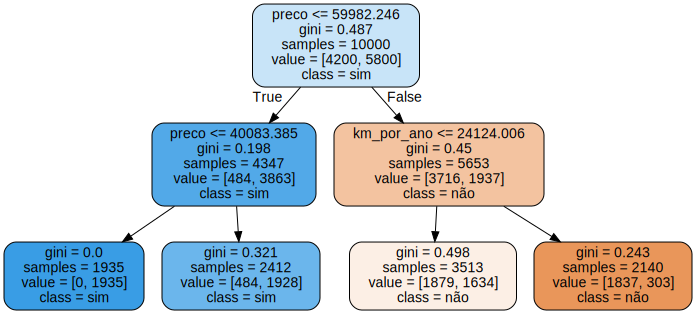

In [8]:
print('-'*30)
# Decision Tree Classifier
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
min = (media - 2 * desvio_padrao) * 100
max = (media + 2 * desvio_padrao) * 100
print(f"Acurácia com Decision Tree Classifier ({min.round(2)} - {max.round(2)})")

print('-'*30)

# GroupKFold para analisar como o modelo se comporta com novos grupos

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1


print('DECISION TREE - Group KFold')
cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

print('-'*30)

print(modelo)

modelo.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                class_names=["não", "sim"], 
                feature_names =  features)

graph = graphviz.Source(dot_data)
graph

In [11]:
print('-'*30)
# Decision Tree Classifier
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
min = (media - 2 * desvio_padrao) * 100
max = (media + 2 * desvio_padrao) * 100
print(f"Acurácia com Decision Tree Classifier ({min.round(2)} - {max.round(2)})")

print('-'*30)

# GroupKFold para analisar como o modelo se comporta com novos grupos

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1


print('DECISION TREE - Group KFold')
cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

print('-'*30)

print(modelo)

modelo.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                class_names=["não", "sim"], 
                feature_names =  features)


------------------------------
Acurácia com Decision Tree Classifier (73.83 - 77.73)
------------------------------
DECISION TREE - Group KFold
Accuracia média 78.67
Intervalo (76.42, 80.93)
------------------------------
DecisionTreeClassifier(max_depth=3)


In [12]:
print('-'*30)
# Decision Tree Classifier
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
min = (media - 2 * desvio_padrao) * 100
max = (media + 2 * desvio_padrao) * 100
print(f"Acurácia com Decision Tree Classifier ({min.round(2)} - {max.round(2)})")

print('-'*30)

# GroupKFold para analisar como o modelo se comporta com novos grupos

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1


print('DECISION TREE - Group KFold')
cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

print('-'*30)

print(modelo)

modelo.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                class_names=["não", "sim"], 
                feature_names =  features)


------------------------------
Acurácia com Decision Tree Classifier (73.83 - 77.73)
------------------------------
DECISION TREE - Group KFold
Accuracia média 77.23
Intervalo (74.7, 79.76)
------------------------------
DecisionTreeClassifier(max_depth=10)


In [ ]:
modelo.